In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fear-greed-index-data/fear_greed_index.csv
/kaggle/input/historical-trader-data/historical_data.csv


In [6]:
import pandas as pd
import os

# Define file paths
sentiment_file_path = '/kaggle/input/fear-greed-index-data/fear_greed_index.csv'
trader_data_file_path = '/kaggle/input/historical-trader-data/historical_data.csv'

try:
    # Load datasets
    df_sentiment = pd.read_csv(sentiment_file_path)
    df_trader = pd.read_csv(trader_data_file_path)

    print("Datasets loaded.")

    # Display initial rows
    print("\n--- Sentiment Data Head ---")
    print(df_sentiment.head())

    print("\n--- Trader Data Head ---")
    print(df_trader.head())

    # Display DataFrame info
    print("\n--- Sentiment Data Info ---")
    df_sentiment.info()

    print("\n--- Trader Data Info ---")
    df_trader.info()

    # Check for missing values
    print("\n--- Sentiment Missing Values ---")
    print(df_sentiment.isnull().sum())

    print("\n--- Trader Data Missing Values ---")
    print(df_trader.isnull().sum())

except FileNotFoundError:
    print("Error: Ensure files are in the correct Kaggle input paths.")
except Exception as e:
    print(f"An error occurred: {e}")

Datasets loaded.

--- Sentiment Data Head ---
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

--- Trader Data Head ---
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      

In [13]:
print("Starting Preprocessing...")

df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])

df_trader['Timestamp IST'] = pd.to_datetime(df_trader['Timestamp IST'], format="%d-%m-%Y %H:%M")

# Extract daily date for merging from trader data
df_trader['trade_date'] = df_trader['Timestamp IST'].dt.date
df_trader['trade_date'] = pd.to_datetime(df_trader['trade_date']) # Convert back to datetime


# Drop duplicates
initial_rows_sentiment = df_sentiment.shape[0]
df_sentiment.drop_duplicates(inplace=True)
if df_sentiment.shape[0] < initial_rows_sentiment:
    print(f"Dropped {initial_rows_sentiment - df_sentiment.shape[0]} sentiment duplicates.")

initial_rows_trader = df_trader.shape[0]
df_trader.drop_duplicates(inplace=True)
if df_trader.shape[0] < initial_rows_trader:
    print(f"Dropped {initial_rows_trader - df_trader.shape[0]} trader duplicates.")


# Confirm data types
print("\n--- Sentiment Info (Preprocessed) ---")
df_sentiment.info()

print("\n--- Trader Info (Preprocessed) ---")
df_trader.info()

print("\nPreprocessing complete.")

Starting Preprocessing...

--- Sentiment Info (Preprocessed) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB

--- Trader Info (Preprocessed) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       21

In [14]:
print("Merging datasets...")

# Merge trader data with sentiment data on daily dates
# Left merge: Keep all rows from df_trader, add sentiment data where dates match
df_merged = pd.merge(df_trader, df_sentiment,
                     left_on='trade_date',
                     right_on='date',
                     how='left')

print("Datasets merged. Displaying merged data head and info:")

# Display first few rows of merged DataFrame
print("\n--- Merged Data Head ---")
print(df_merged.head())

# Display info of merged DataFrame
print("\n--- Merged Data Info ---")
df_merged.info()

# Check for sentiment data availability after merge
print("\n--- Missing Sentiment After Merge ---")
print(df_merged['classification'].isnull().sum())
print(f"Total rows in merged data: {df_merged.shape[0]}")

Merging datasets...
Datasets merged. Displaying merged data head and info:

--- Merged Data Head ---
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521      

Starting Exploratory Data Analysis (EDA)...

--- Descriptive Statistics for Merged Data ---
       Execution Price   Size Tokens      Size USD  Start Position  \
count    211224.000000  2.112240e+05  2.112240e+05    2.112240e+05   
mean      11414.723350  4.623365e+03  5.639451e+03   -2.994625e+04   
std       29447.654868  1.042729e+05  3.657514e+04    6.738074e+05   
min           0.000005  8.740000e-07  0.000000e+00   -1.433463e+07   
25%           4.854700  2.940000e+00  1.937900e+02   -3.762311e+02   
50%          18.280000  3.200000e+01  5.970450e+02    8.472793e+01   
75%         101.580000  1.879025e+02  2.058960e+03    9.337278e+03   
max      109004.000000  1.582244e+07  3.921431e+06    3.050948e+07   

          Closed PnL            Fee          value  
count  211224.000000  211224.000000  211218.000000  
mean       48.749001       1.163967      51.649656  
std       919.164828       6.758854      21.012784  
min   -117990.104100      -1.175712      10.000000  
25%         

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


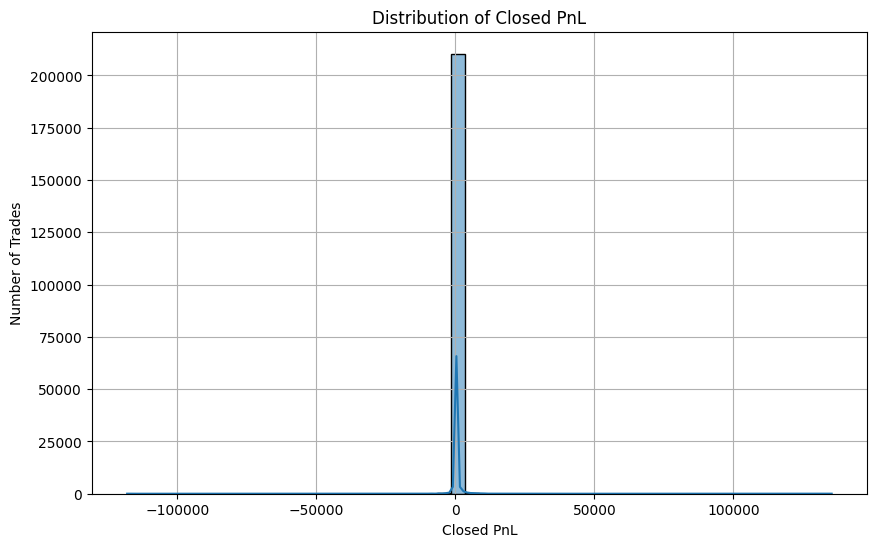

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


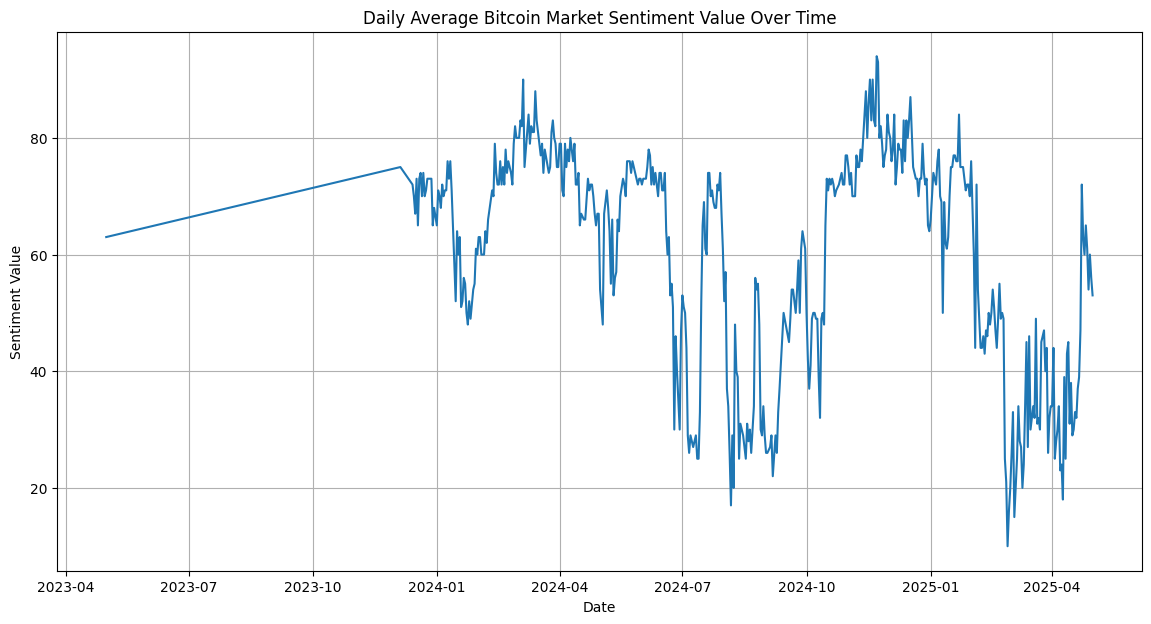


EDA steps complete. Reviewing distributions and trends.


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Starting Exploratory Data Analysis (EDA)...")

## Step 1: Descriptive Statistics for Numerical Columns

print("\n--- Descriptive Statistics for Merged Data ---")
print(df_merged[['Execution Price', 'Size Tokens', 'Size USD',
                 'Start Position', 'Closed PnL', 'Fee', 'value']].describe())

## Step 2: Value Counts for Categorical Columns
print("\n--- Value Counts for 'Side' ---")
print(df_merged['Side'].value_counts())

print("\n--- Value Counts for 'Direction' ---")
print(df_merged['Direction'].value_counts())

print("\n--- Value Counts for 'classification' (Market Sentiment) ---")
print(df_merged['classification'].value_counts())

print("\n--- Value Counts for 'Coin' ---")
print(df_merged['Coin'].value_counts())

## Step 3: Distribution of Closed PnL
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['Closed PnL'], bins=50, kde=True)
plt.title('Distribution of Closed PnL')
plt.xlabel('Closed PnL')
plt.ylabel('Number of Trades')
plt.grid(True)
plt.show()

## Step 4: Time Series of Market Sentiment Value
daily_sentiment = df_merged.groupby('date')['value'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_sentiment, x='date', y='value')
plt.title('Daily Average Bitcoin Market Sentiment Value Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Value')
plt.grid(True)
plt.show()

print("\nEDA steps complete. Reviewing distributions and trends.")

Starting Sentiment-Performance Analysis...

--- Average Closed PnL by Sentiment Classification ---
classification
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Extreme Fear     34.537862
Neutral          34.307718
Name: Closed PnL, dtype: float64


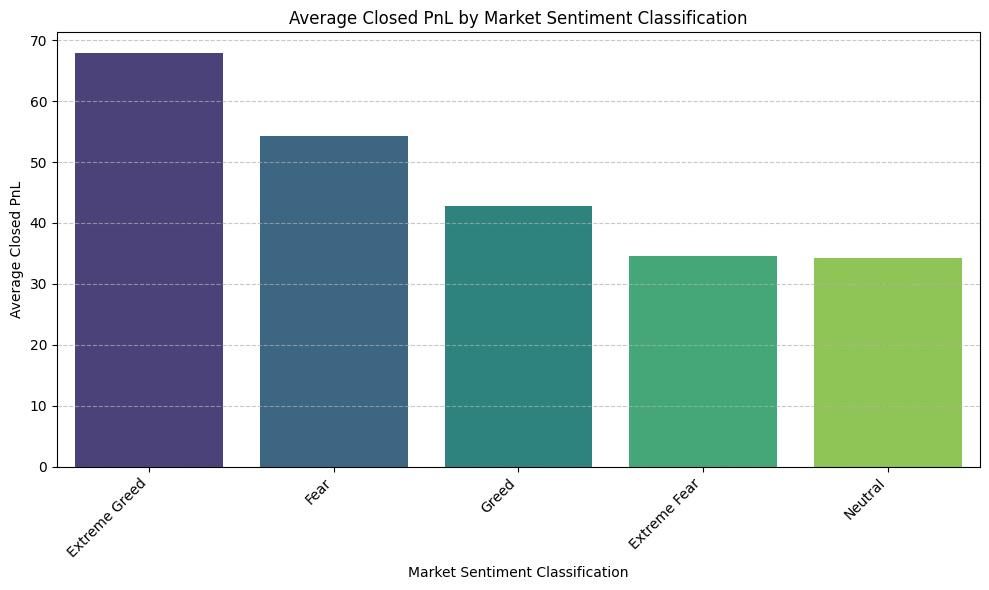


--- Total Trade Volume (USD) by Sentiment Classification ---
classification
Fear             4.833248e+08
Greed            2.885825e+08
Neutral          1.802421e+08
Extreme Greed    1.244652e+08
Extreme Fear     1.144843e+08
Name: Size USD, dtype: float64


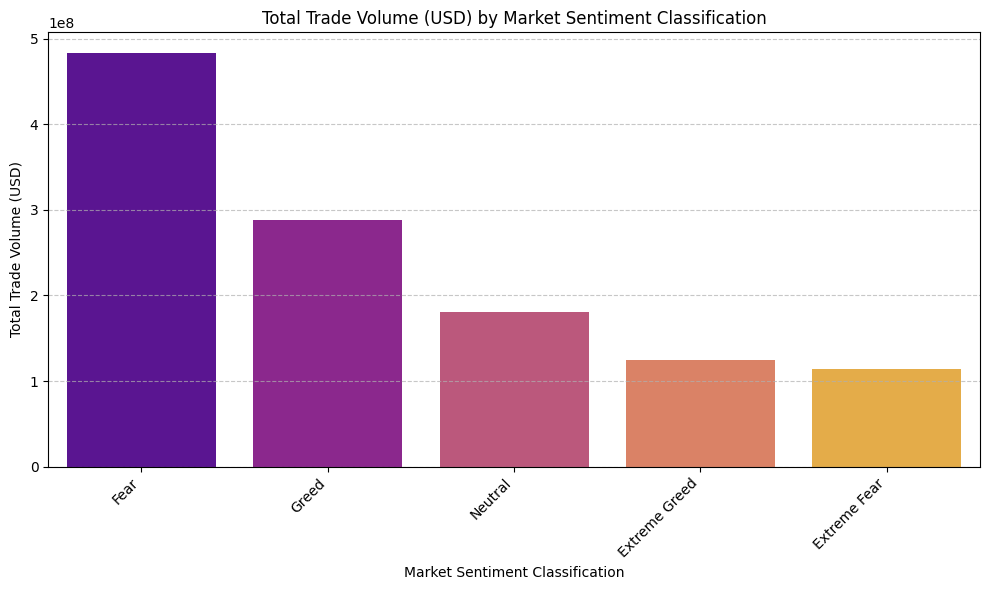


--- Number of Trades by Sentiment Classification ---
classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


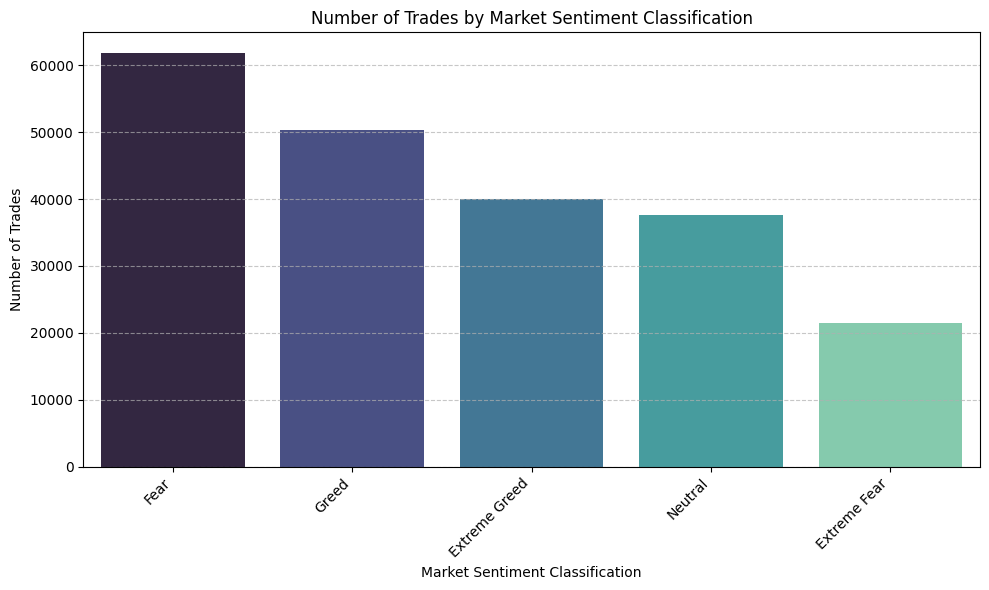


Sentiment-Performance Analysis complete. Insights extracted.


In [17]:
print("Starting Sentiment-Performance Analysis...")

## Step 1: Average Closed PnL by Market Sentiment Classification
pnl_by_sentiment = df_merged.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)
print("\n--- Average Closed PnL by Sentiment Classification ---")
print(pnl_by_sentiment)

# Visualize average PnL by sentiment
plt.figure(figsize=(10, 6))
sns.barplot(x=pnl_by_sentiment.index, y=pnl_by_sentiment.values, palette='viridis')
plt.title('Average Closed PnL by Market Sentiment Classification')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Step 2: Total Trade Volume (USD) by Market Sentiment Classification
volume_by_sentiment = df_merged.groupby('classification')['Size USD'].sum().sort_values(ascending=False)
print("\n--- Total Trade Volume (USD) by Sentiment Classification ---")
print(volume_by_sentiment)

# Visualize total trade volume by sentiment
plt.figure(figsize=(10, 6))
sns.barplot(x=volume_by_sentiment.index, y=volume_by_sentiment.values, palette='plasma')
plt.title('Total Trade Volume (USD) by Market Sentiment Classification')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Total Trade Volume (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Step 3: Count of Trades by Market Sentiment Classification
trades_by_sentiment = df_merged['classification'].value_counts()
print("\n--- Number of Trades by Sentiment Classification ---")
print(trades_by_sentiment)

# Visualize number of trades by sentiment
plt.figure(figsize=(10, 6))
sns.barplot(x=trades_by_sentiment.index, y=trades_by_sentiment.values, palette='mako')
plt.title('Number of Trades by Market Sentiment Classification')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


print("\nSentiment-Performance Analysis complete. Insights extracted.")

Further pattern analysis beginning...


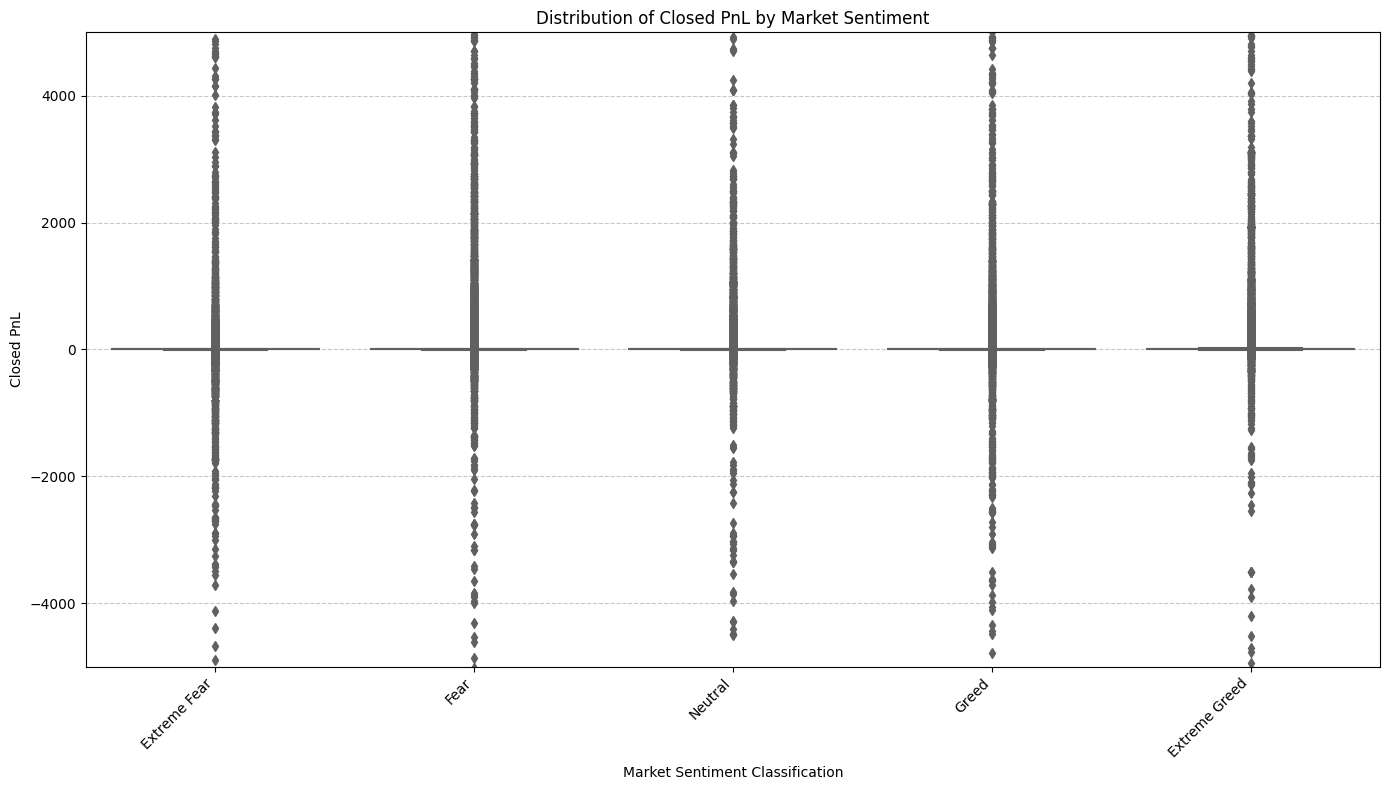


--- Average Closed PnL by Sentiment and Trade Side ---
Side                  BUY        SELL
classification                       
Extreme Fear    34.114627   34.980106
Extreme Greed   10.498927  114.584643
Fear            63.927104   45.049641
Greed           25.002302   59.691091
Neutral         29.227429   39.456408


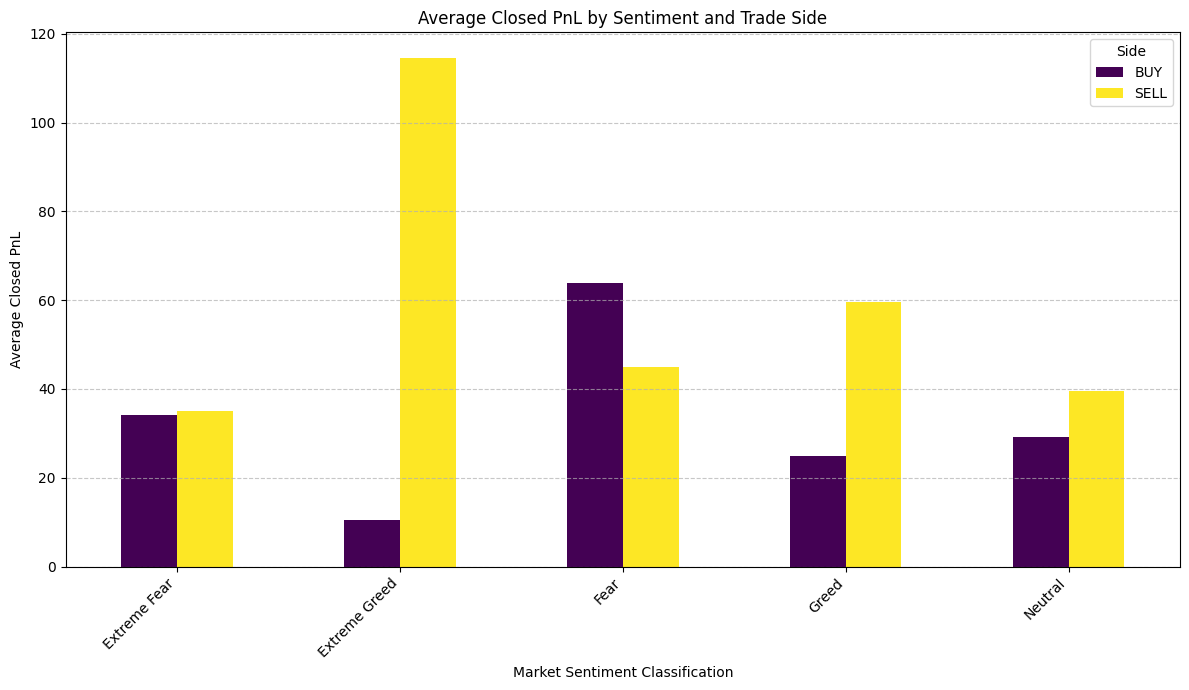


Pattern analysis complete.


In [18]:
print("Further pattern analysis beginning...")

## Step 1: PnL Distribution by Market Sentiment Classification
plt.figure(figsize=(14, 8))
sns.boxplot(x='classification', y='Closed PnL', data=df_merged,
            order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'], palette='coolwarm')
plt.title('Distribution of Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Closed PnL')
plt.ylim(-5000, 5000)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Step 2: Average Closed PnL by Sentiment AND Trade Side (BUY/SELL)
pnl_by_sentiment_side = df_merged.groupby(['classification', 'Side'])['Closed PnL'].mean().unstack()
print("\n--- Average Closed PnL by Sentiment and Trade Side ---")
print(pnl_by_sentiment_side)

# Visualize this
pnl_by_sentiment_side.plot(kind='bar', figsize=(12, 7), colormap='viridis')
plt.title('Average Closed PnL by Sentiment and Trade Side')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nPattern analysis complete.")

Starting Enhanced Analysis...


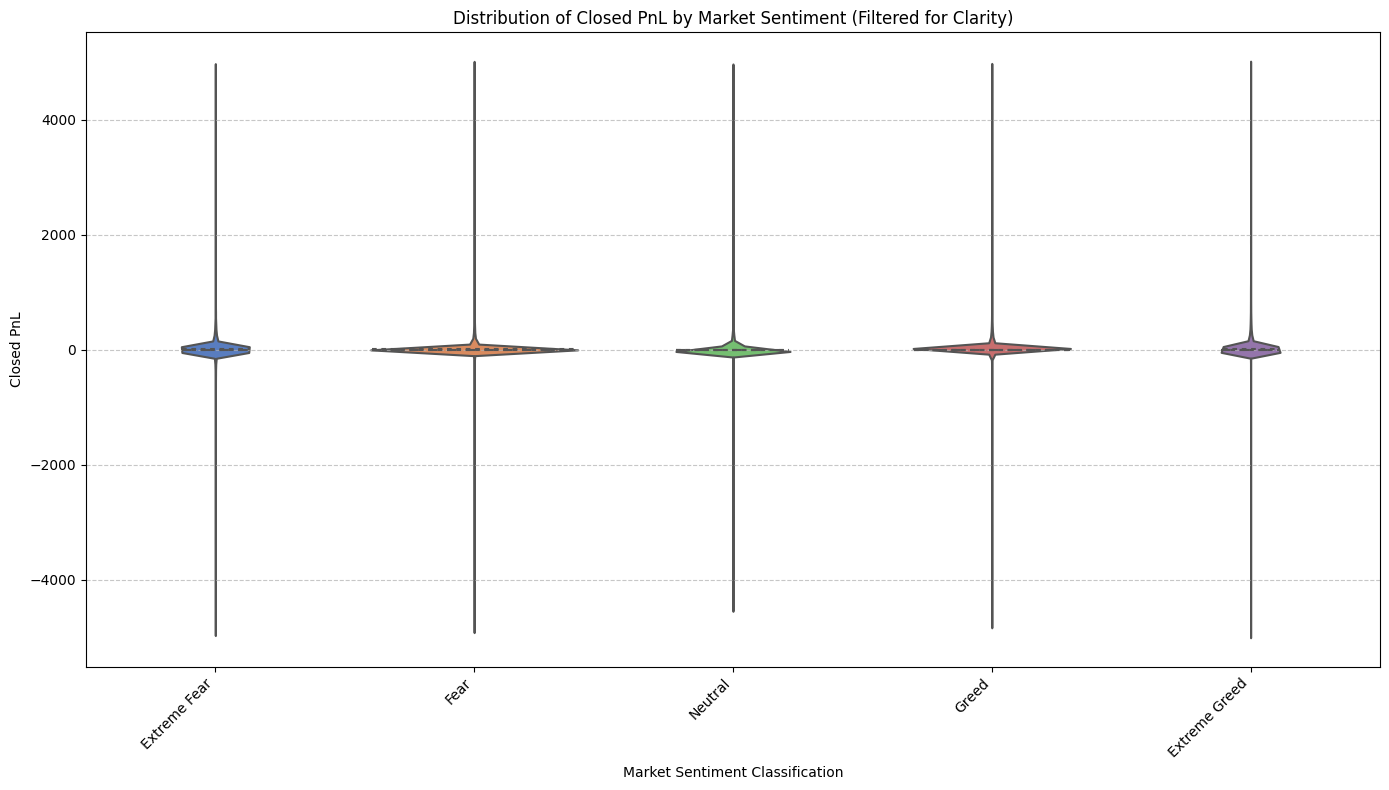


--- Top 10 Accounts by Total Closed PnL ---
Account
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    2.143383e+06
0x083384f897ee0f19899168e3b1bec365f52a9012    1.600230e+06
0xbaaaf6571ab7d571043ff1e313a9609a10637864    9.401638e+05
0x513b8629fe877bb581bf244e326a047b249c4ff1    8.404226e+05
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    8.360806e+05
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4    6.777471e+05
0x72743ae2822edd658c0c50608fd7c5c501b2afbd    4.293556e+05
0x430f09841d65beb3f27765503d0f850b8bce7713    4.165419e+05
0x72c6a4624e1dffa724e6d00d64ceae698af892a0    4.030115e+05
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4    3.790954e+05
Name: Closed PnL, dtype: float64

--- PnL Distribution for Top Accounts (0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23, 0x083384f897ee0f19899168e3b1bec365f52a9012, 0xbaaaf6571ab7d571043ff1e313a9609a10637864) by Sentiment ---


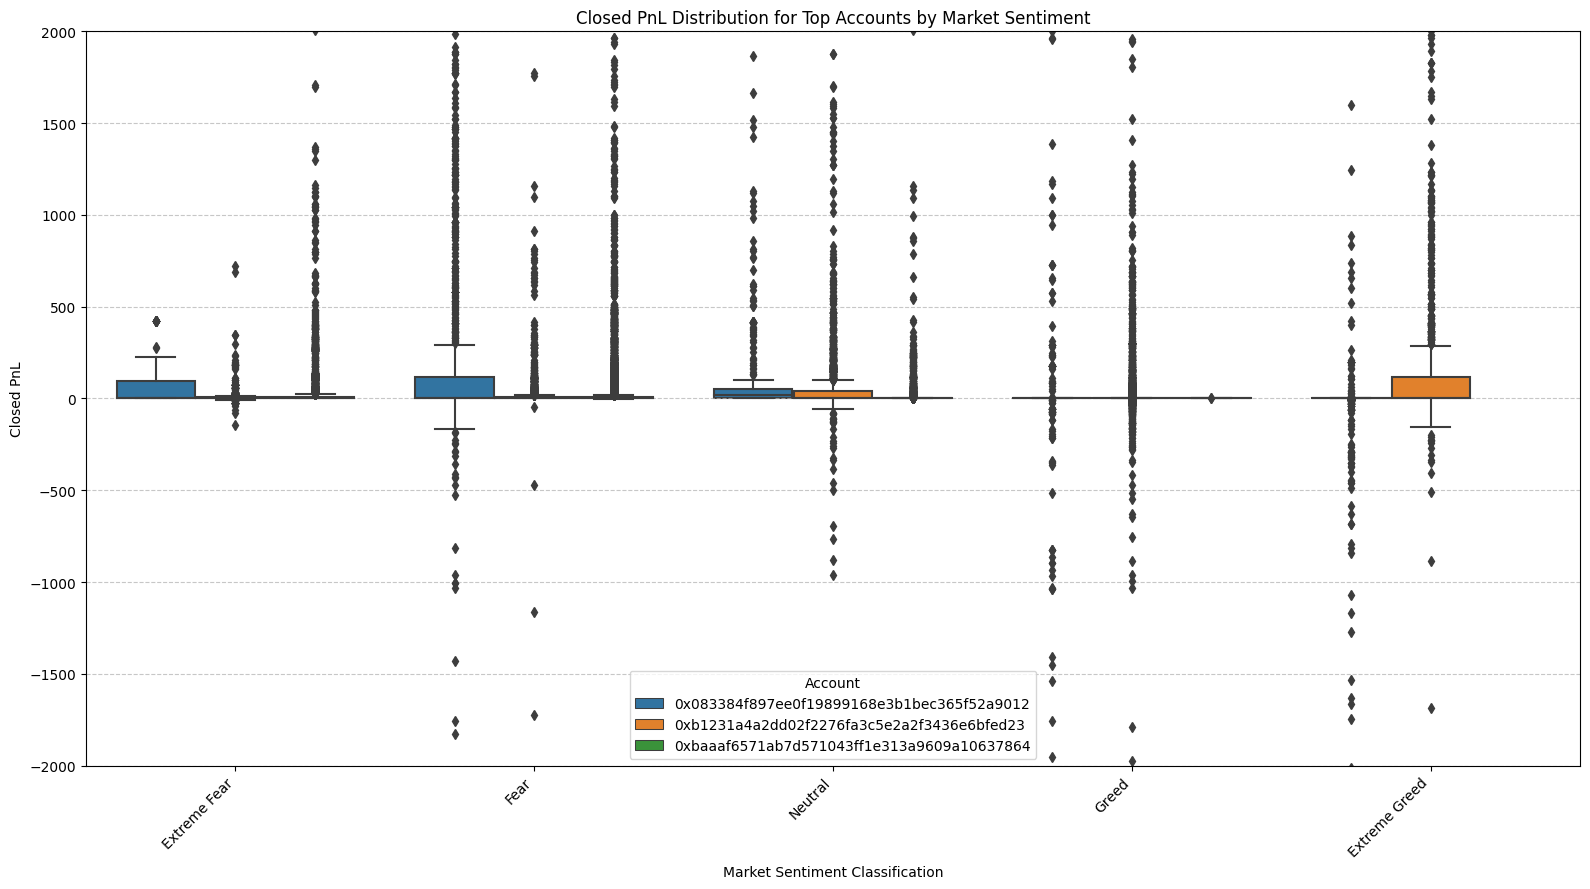


Enhanced analysis complete.


In [19]:
print("Starting Enhanced Analysis...")

## Step 1: Detailed PnL Distribution by Market Sentiment
pnl_filtered = df_merged[
    (df_merged['Closed PnL'] > -5000) & (df_merged['Closed PnL'] < 5000)

plt.figure(figsize=(14, 8))
sns.violinplot(x='classification', y='Closed PnL', data=pnl_filtered,
               order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'],
               palette='muted', inner='quartile')
plt.title('Distribution of Closed PnL by Market Sentiment (Filtered for Clarity)')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Closed PnL')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Step 2: Analyze Top Performing Accounts Across Sentiments
account_total_pnl = df_merged.groupby('Account')['Closed PnL'].sum().sort_values(ascending=False)

print("\n--- Top 10 Accounts by Total Closed PnL ---")
print(account_total_pnl.head(10))

top_accounts = account_total_pnl.head(3).index.tolist() # Get the Account IDs of top 3

if top_accounts: 
    print(f"\n--- PnL Distribution for Top Accounts ({', '.join(top_accounts)}) by Sentiment ---")
    df_top_traders = df_merged[df_merged['Account'].isin(top_accounts)]

    plt.figure(figsize=(16, 9))
    sns.boxplot(x='classification', y='Closed PnL', hue='Account', data=df_top_traders,
                order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'],
                palette='tab10')
    plt.title('Closed PnL Distribution for Top Accounts by Market Sentiment')
    plt.xlabel('Market Sentiment Classification')
    plt.ylabel('Closed PnL')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(-2000, 2000) 
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Account')
    plt.tight_layout()
    plt.show()
else:
    print("No top accounts found or available for analysis.")


print("\nEnhanced analysis complete.")